<a href="https://colab.research.google.com/github/Saketkr06/Saketkr06/blob/main/Market_Timing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: UTKARSH DIXIT
SSGA: ASSIGNMENT 1

INSTALLING LIBRARIES

In [ ]:
install.packages("stats")
install.packages("stats4")
install.packages("statsmodels")
install.packages("tseries")
install.packages("dynlm")
install.packages("forecast")
install.packages("fGarch")
install.packages("urca")
install.packages("car")
install.packages("lmtest")
install.packages("tsDyn")
install.packages("vars")
install.packages('ggplot')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats4’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘statsmodels’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nlopt

LIBRARIES

In [ ]:
library(ggplot2)
library(tseries)
library(lmtest)
library(vars)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: MASS

Loading required package: strucchange

Loading required package: sandwich

Loading required package: urca



**MARKET TIMING MODEL**

-----



In [ ]:
# Load the CSV file into a DataFrame
data <- read.csv('SSGA_comp.csv')

# Set the index to the 'DATE' column
row.names(data) <- data$DATE
data$DATE <- NULL

# Display the shape of the data
cat("Shape of data: ", dim(data), "\n")

# Display the first few rows of the data
head(data)


Shape of data:  119 6 


,Eco_Growth,Inflation,Int..Trade,Monetary_Policy,Risk_Apetite,S.P
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01-09-2013,0.09,233.544,93.47056,0.4040000,4.642857,1687.174
01-10-2013,-0.01,233.669,92.49927,0.3354545,4.554348,1720.027
01-11-2013,0.29,234.100,93.37367,0.3036842,4.321364,1783.541
01-12-2013,-0.16,234.719,93.53402,0.3400000,4.087143,1807.775
01-01-2014,-0.71,235.288,94.46475,0.3938095,3.967727,1822.357
01-02-2014,0.44,235.547,94.64558,0.3268421,4.030500,1817.035


In [ ]:
# Calculate the return percentage and store it in a new column
data$return_percentage <- diff(data$S.P) / lag(data$S.P) * 100

# Fill any NA values with 0 for the first row
data$return_percentage[1] <- 0

# Print the first few rows of the data frame with the new column
head(data)



Warning message in diff(data$S.P)/lag(data$S.P):
“longer object length is not a multiple of shorter object length”


,Eco_Growth,Inflation,Int..Trade,Monetary_Policy,Risk_Apetite,S.P,return_percentage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01-09-2013,0.09,233.544,93.47056,0.4040000,4.642857,1687.174,0.0000000
01-10-2013,-0.01,233.669,92.49927,0.3354545,4.554348,1720.027,3.6926453
01-11-2013,0.29,234.100,93.37367,0.3036842,4.321364,1783.541,1.3587710
01-12-2013,-0.16,234.719,93.53402,0.3400000,4.087143,1807.775,0.8065952
01-01-2014,-0.71,235.288,94.46475,0.3938095,3.967727,1822.357,-0.2920356
01-02-2014,0.44,235.547,94.64558,0.3268421,4.030500,1817.035,2.5584869


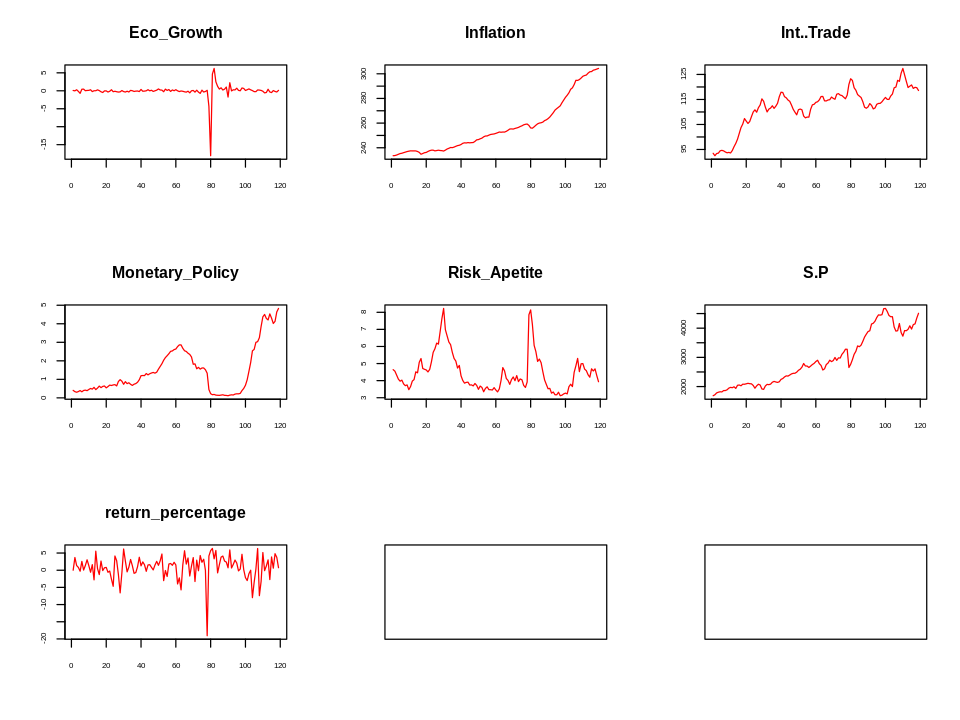

In [ ]:
# Set up the layout for subplots
layout(matrix(1:9, nrow = 3, ncol = 3))
par(mfrow = c(3, 3))
options(repr.plot.width=8, repr.plot.height=6)

# Get column names
columns <- colnames(data)

# Loop through columns and create plots
for (i in 1:length(columns)) {
  column <- columns[i]

  # Plot the data
  plot(data[, column], type = 'l', col = 'red', lwd = 1, xaxt = 'n', yaxt = 'n', xlab = '', ylab = '')

  # Decorations
  title(main = column)
  axis(1, at = axTicks(1), labels = axTicks(1), cex.axis = 0.6)
  axis(2, cex.axis = 0.6)
}

# Close any unused subplots
for (i in (length(columns) + 1):9) {
  plot(0, type = 'n', xaxt = 'n', yaxt = 'n', xlab = '', ylab = '')
}

# Reset the layout
par(mfrow = c(1, 1))


#two empty boxes are there you can ignore them.

PLOT OF RETURN_PERCENTAG VS EACH VARIABLE


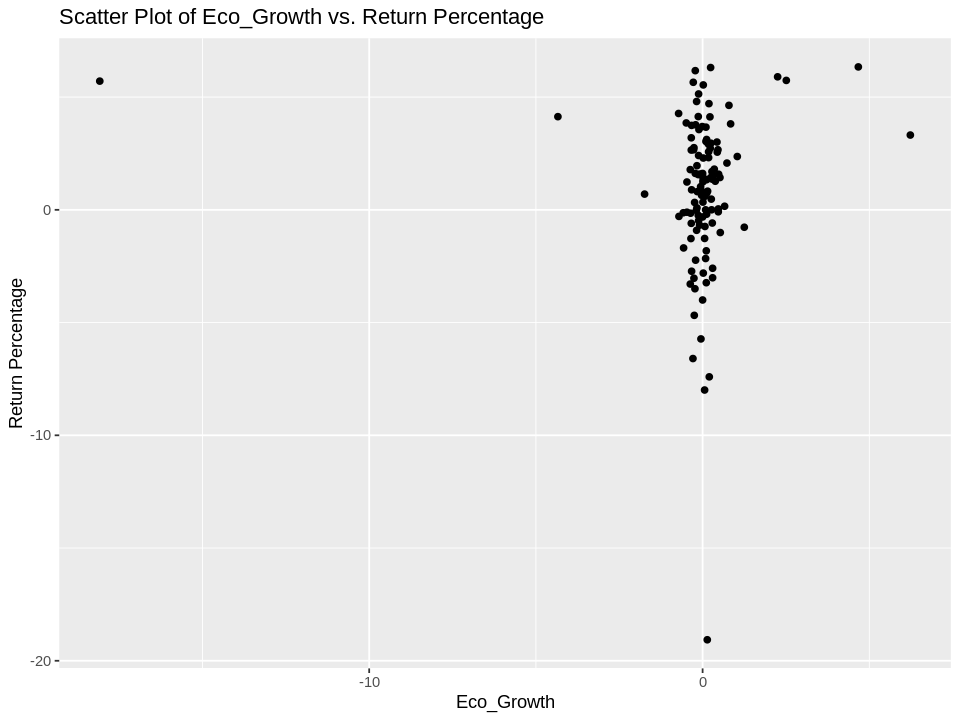

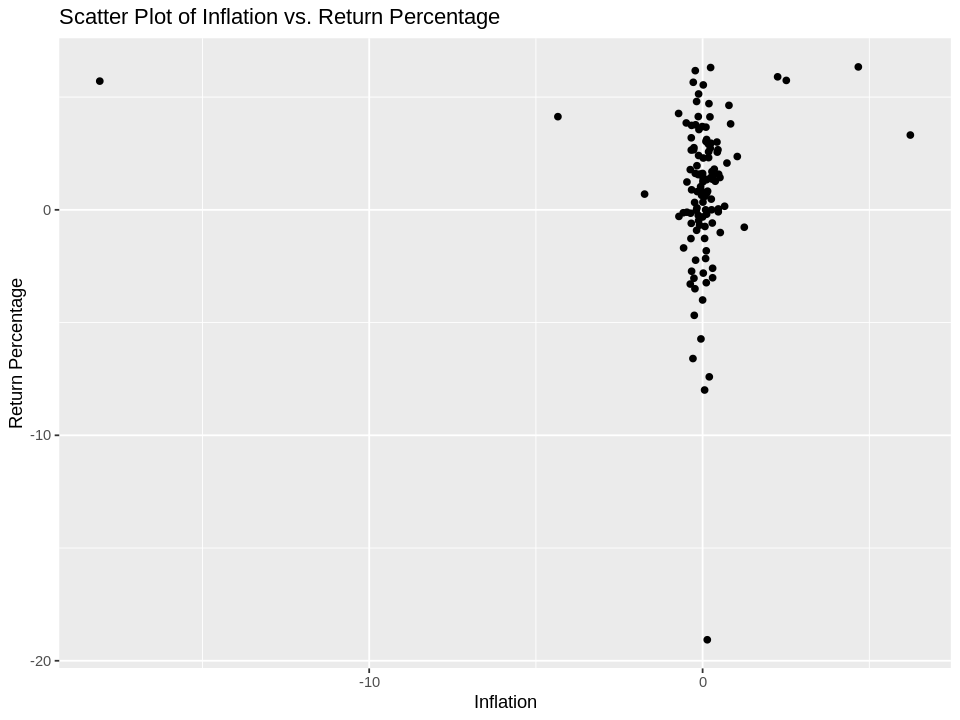

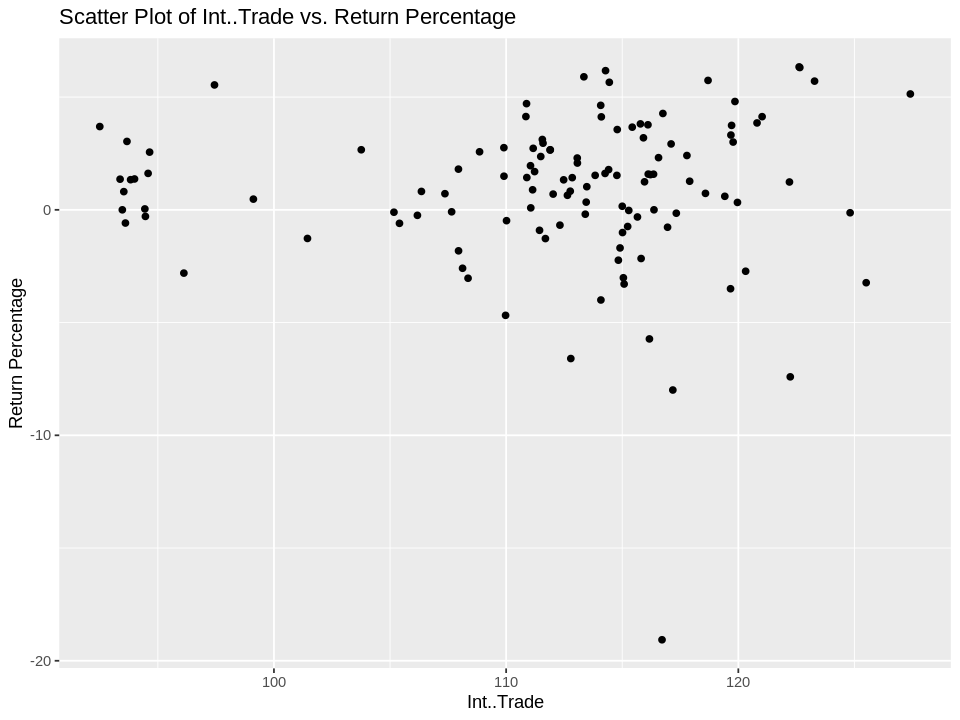

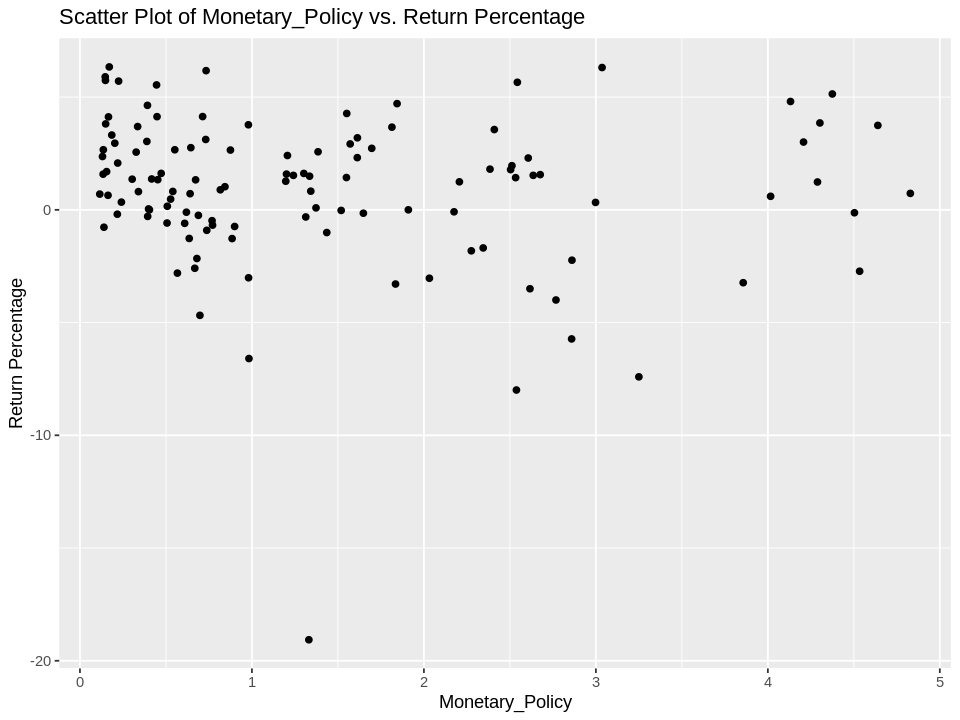

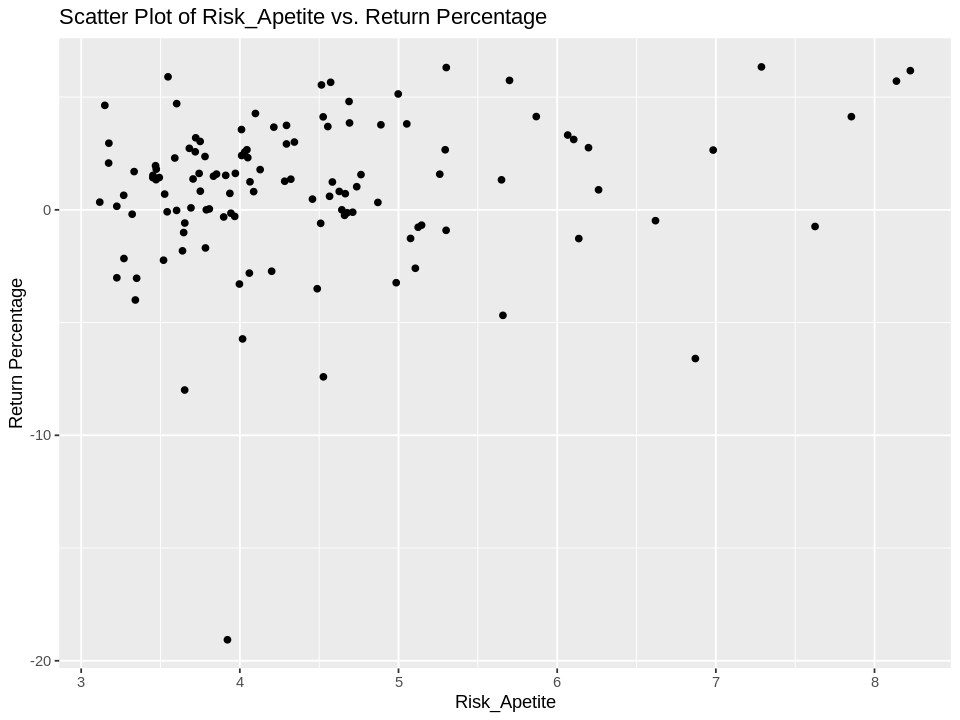

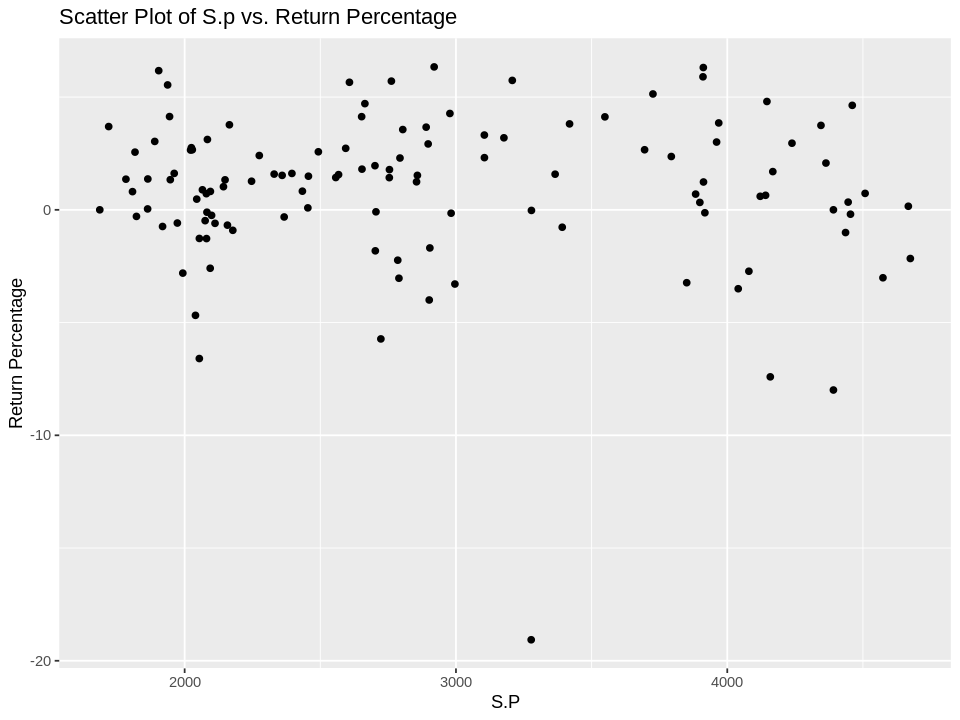

In [ ]:

ggplot(data, aes(x = Eco_Growth, y = return_percentage)) +
  geom_point() +
  labs(x = "Eco_Growth", y = "Return Percentage") +
  ggtitle("Scatter Plot of Eco_Growth vs. Return Percentage")
ggplot(data, aes(x = Eco_Growth, y = return_percentage)) +
  geom_point() +
  labs(x = "Inflation", y = "Return Percentage") +
  ggtitle("Scatter Plot of Inflation vs. Return Percentage")
ggplot(data, aes(x = Int..Trade, y = return_percentage)) +
  geom_point() +
  labs(x = "Int..Trade", y = "Return Percentage") +
  ggtitle("Scatter Plot of Int..Trade vs. Return Percentage")
ggplot(data, aes(x = Monetary_Policy, y = return_percentage)) +
  geom_point() +
  labs(x = "Monetary_Policy", y = "Return Percentage") +
  ggtitle("Scatter Plot of Monetary_Policy vs. Return Percentage")
ggplot(data, aes(x = Risk_Apetite, y = return_percentage)) +
  geom_point() +
  labs(x = "Risk_Apetite", y = "Return Percentage") +
  ggtitle("Scatter Plot of Risk_Apetite vs. Return Percentage")
ggplot(data, aes(x = S.P, y = return_percentage)) +
  geom_point() +
  labs(x = "S.P", y = "Return Percentage") +
  ggtitle("Scatter Plot of S.p vs. Return Percentage")

CHECK STATIONARITY

In [ ]:
# Perform Augmented Dickey-Fuller tests and print the results
adf_test_and_print <- function(column_name, max_lag = 0) {
  cat(column_name, "\n")
  adf_result <- adf.test(data[[column_name]], k = max_lag)
  cat(paste("ADF Statistic: ", adf_result$statistic, "\n"))
  cat(paste("p-value: ", adf_result$p.value, "\n\n"))
}

# Perform Augmented Dickey-Fuller tests for different columns
adf_test_and_print("Eco_Growth")
adf_test_and_print("Inflation", max_lag = 5)
adf_test_and_print("Int..Trade",max_lag = 3)
adf_test_and_print("Monetary_Policy")
adf_test_and_print("Risk_Apetite")
adf_test_and_print("S.P")
adf_test_and_print("return_percentage")


Eco_Growth 


Warning message in adf.test(data[[column_name]], k = max_lag):
“p-value smaller than printed p-value”


ADF Statistic:  -9.7980913957527 
p-value:  0.01 

Inflation 
ADF Statistic:  -1.23336743364799 
p-value:  0.894947079049838 

Int..Trade 
ADF Statistic:  -2.30077762812778 
p-value:  0.451670420212714 

Monetary_Policy 


Warning message in adf.test(data[[column_name]], k = max_lag):
“p-value greater than printed p-value”


ADF Statistic:  0.330833398840189 
p-value:  0.99 

Risk_Apetite 
ADF Statistic:  -2.56952957343943 
p-value:  0.340062469501899 

S.P 
ADF Statistic:  -2.11012429261831 
p-value:  0.530845393430934 

return_percentage 


Warning message in adf.test(data[[column_name]], k = max_lag):
“p-value smaller than printed p-value”


ADF Statistic:  -10.123546686435 
p-value:  0.01 



CHECK ASSOCIATION BETWEEN OTHER TIME SERIES AND RETURN_PERCENTAGE

In [ ]:
# Define a function to perform Granger causality tests and print the results
granger_test <- function(data, x_col, y_col, max_lag = 5) {
  cat(x_col, "causes Returns?\n")
  cat("------------------\n")

  # Perform Granger causality test
  granger_result <- grangertest(data[[x_col]], data[[y_col]], order = max_lag)
  print(granger_result)
}

# Perform Granger causality tests for various pairs of variables
granger_test(data, "Eco_Growth", "return_percentage", max_lag = 5)
granger_test(data, "Inflation", "return_percentage", max_lag = 5)
granger_test(data, "Int..Trade", "return_percentage", max_lag = 5)  # Note the column name
granger_test(data, "Monetary_Policy", "return_percentage", max_lag = 5)
granger_test(data, "Risk_Apetite", "return_percentage", max_lag = 5)


Eco_Growth causes Returns?
------------------
Granger causality test

Model 1: data[[y_col]] ~ Lags(data[[y_col]], 1:5) + Lags(data[[x_col]], 1:5)
Model 2: data[[y_col]] ~ Lags(data[[y_col]], 1:5)
  Res.Df Df      F Pr(>F)
1    103                 
2    108 -5 1.8462 0.1104
Inflation causes Returns?
------------------
Granger causality test

Model 1: data[[y_col]] ~ Lags(data[[y_col]], 1:5) + Lags(data[[x_col]], 1:5)
Model 2: data[[y_col]] ~ Lags(data[[y_col]], 1:5)
  Res.Df Df      F  Pr(>F)  
1    103                    
2    108 -5 2.4376 0.03938 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Int..Trade causes Returns?
------------------
Granger causality test

Model 1: data[[y_col]] ~ Lags(data[[y_col]], 1:5) + Lags(data[[x_col]], 1:5)
Model 2: data[[y_col]] ~ Lags(data[[y_col]], 1:5)
  Res.Df Df      F Pr(>F)
1    103                 
2    108 -5 0.7419 0.5938
Monetary_Policy causes Returns?
------------------
Granger causality test

Model 1: data[[y_col]] ~ 

CHECK ASSOCIATION BETWEEN OTHER TIME SERIES AND S&P 500 ADJUSTED CLOSING PRICES

In [ ]:
#done this just for the sake of checking
# Define a function to perform Granger causality tests and print the results
granger_test <- function(data, x_col, y_col, max_lag = 4) {
  cat(x_col, "causes S&P?\n")
  cat("------------------\n")

  # Perform Granger causality test
  granger_result <- grangertest(data[[x_col]], data[[y_col]], order = max_lag)
  print(granger_result)
}

# Perform Granger causality tests for various pairs of variables with respect to 'S&P'
granger_test(data, "Eco_Growth", "S.P", max_lag = 4)
granger_test(data, "Inflation", "S.P", max_lag = 4)
granger_test(data, "Int..Trade", "S.P", max_lag = 4)  # Note the column name
granger_test(data, "Monetary_Policy", "S.P", max_lag = 4)
granger_test(data, "Risk_Apetite", "S.P", max_lag = 4)


Eco_Growth causes S&P?
------------------
Granger causality test

Model 1: data[[y_col]] ~ Lags(data[[y_col]], 1:4) + Lags(data[[x_col]], 1:4)
Model 2: data[[y_col]] ~ Lags(data[[y_col]], 1:4)
  Res.Df Df      F Pr(>F)
1    106                 
2    110 -4 1.2994 0.2751
Inflation causes S&P?
------------------
Granger causality test

Model 1: data[[y_col]] ~ Lags(data[[y_col]], 1:4) + Lags(data[[x_col]], 1:4)
Model 2: data[[y_col]] ~ Lags(data[[y_col]], 1:4)
  Res.Df Df      F  Pr(>F)  
1    106                    
2    110 -4 2.8011 0.02952 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Int..Trade causes S&P?
------------------
Granger causality test

Model 1: data[[y_col]] ~ Lags(data[[y_col]], 1:4) + Lags(data[[x_col]], 1:4)
Model 2: data[[y_col]] ~ Lags(data[[y_col]], 1:4)
  Res.Df Df      F Pr(>F)
1    106                 
2    110 -4 0.5373 0.7086
Monetary_Policy causes S&P?
------------------
Granger causality test

Model 1: data[[y_col]] ~ Lags(data[[y_col

ACF PLOT

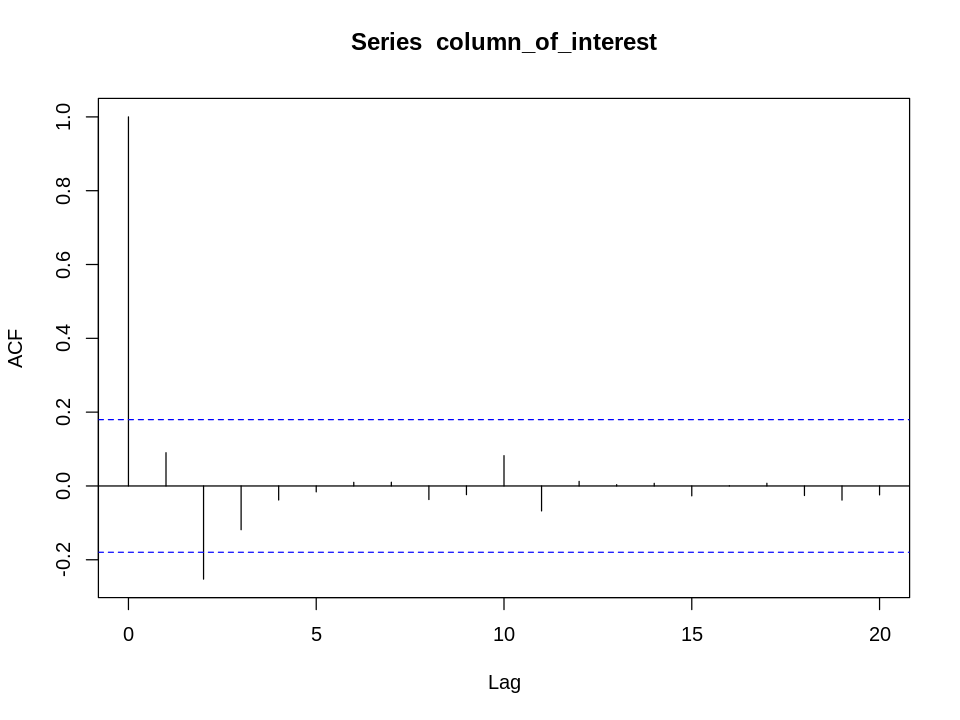

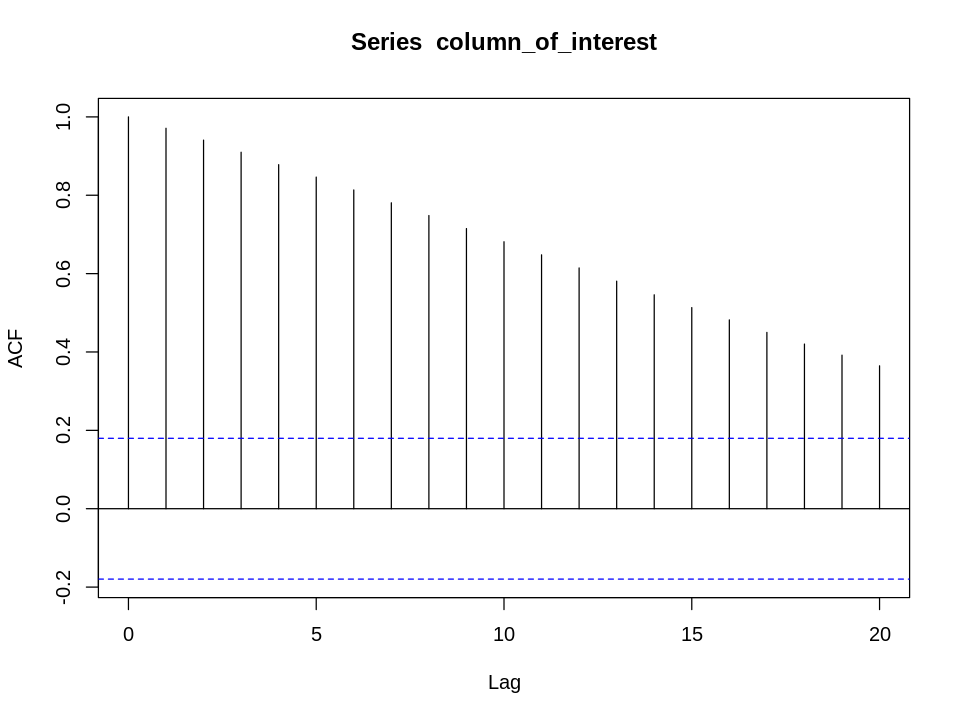

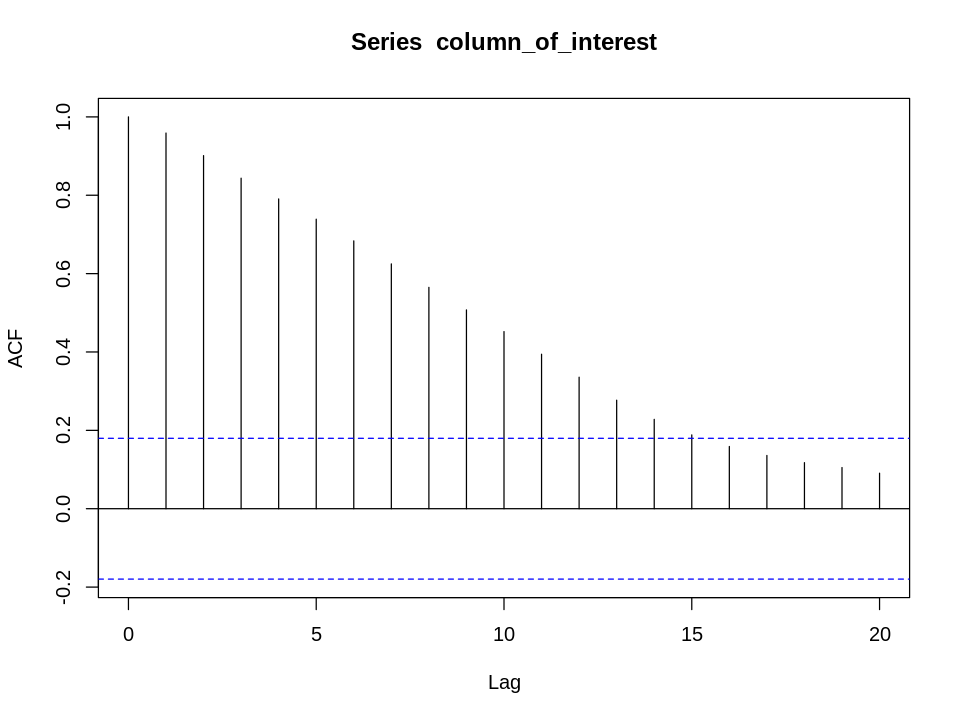

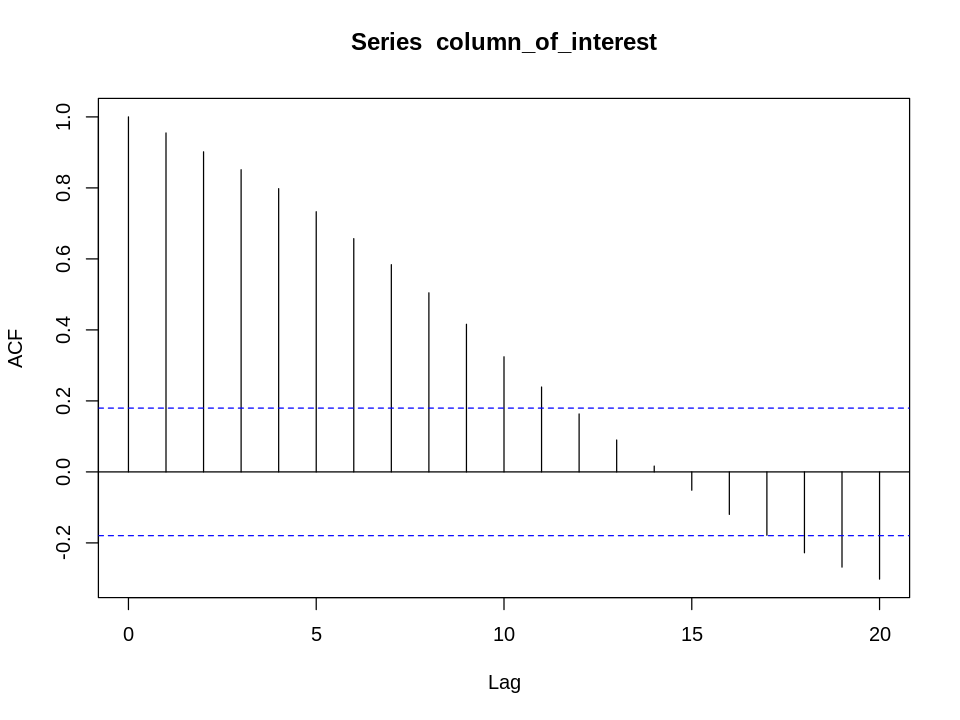

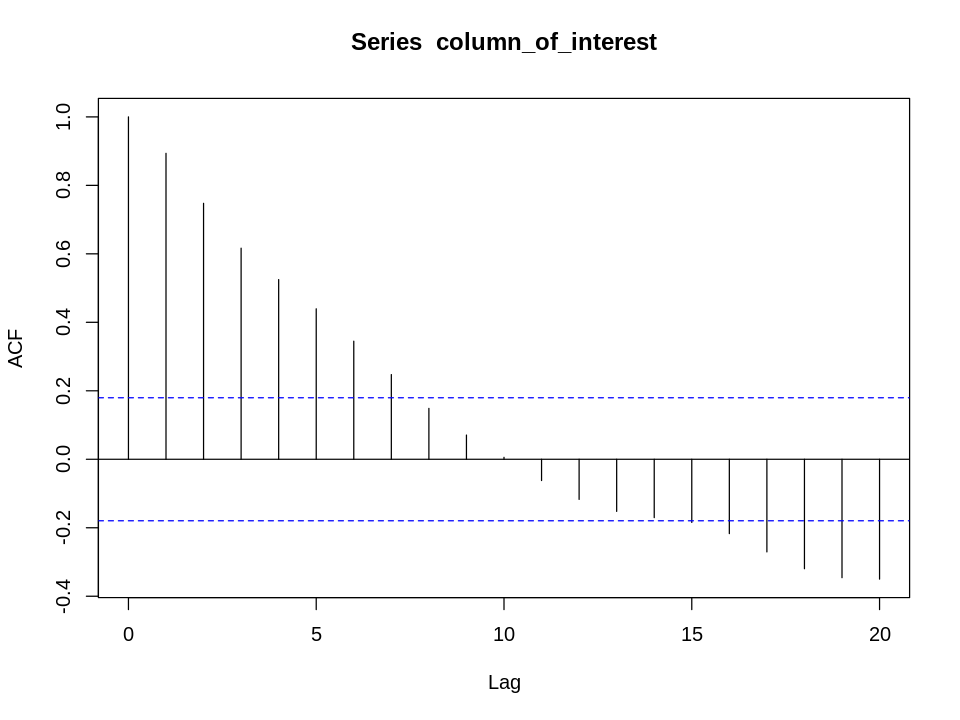

In [ ]:
#Plot ACF plot
# 'Eco_Growth' is the column of interest
column_of_interest <- data$Eco_Growth

# Plot the ACF of the 'Eco_Growth' column
acf_plot <- acf(column_of_interest, lag.max = 20)  # Adjust lag.max as needed

#  'Inflation' is the column of interest
column_of_interest <- data$Inflation

# Plot the ACF of the 'Eco_Inflation' column
acf_plot <- acf(column_of_interest, lag.max = 20)  # Adjust lag.max as needed

#  'Int..Trade' is the column of interest
column_of_interest <- data$Int..Trade

# Plot the ACF of the 'Int..Trade' column
acf_plot <- acf(column_of_interest, lag.max = 20)  # Adjust lag.max as needed

# 'Monetary_Policy' is the column of interest
column_of_interest <- data$Monetary_Policy

# Plot the ACF of the 'Monetary_Policy' column
acf_plot <- acf(column_of_interest, lag.max = 20)  # Adjust lag.max as needed

# 'Risk_Apetite' is the column of interest
column_of_interest <- data$Risk_Apetite

# Plot the ACF of the 'Risk_Apetite' column
acf_plot <- acf(column_of_interest, lag.max = 20)  # Adjust lag.max as needed


PACF PLOT

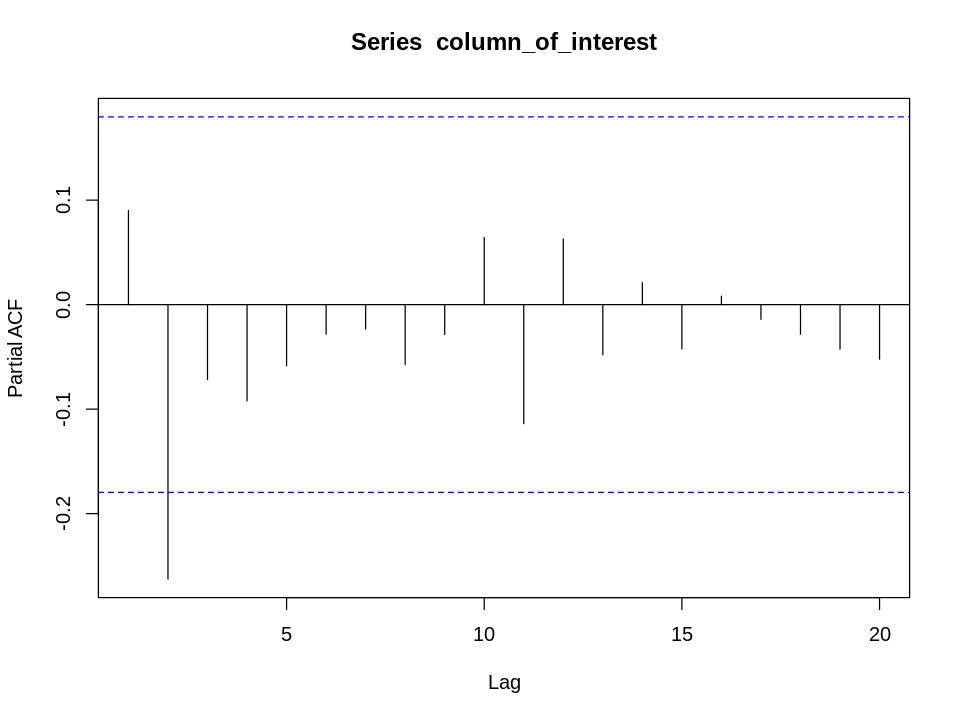

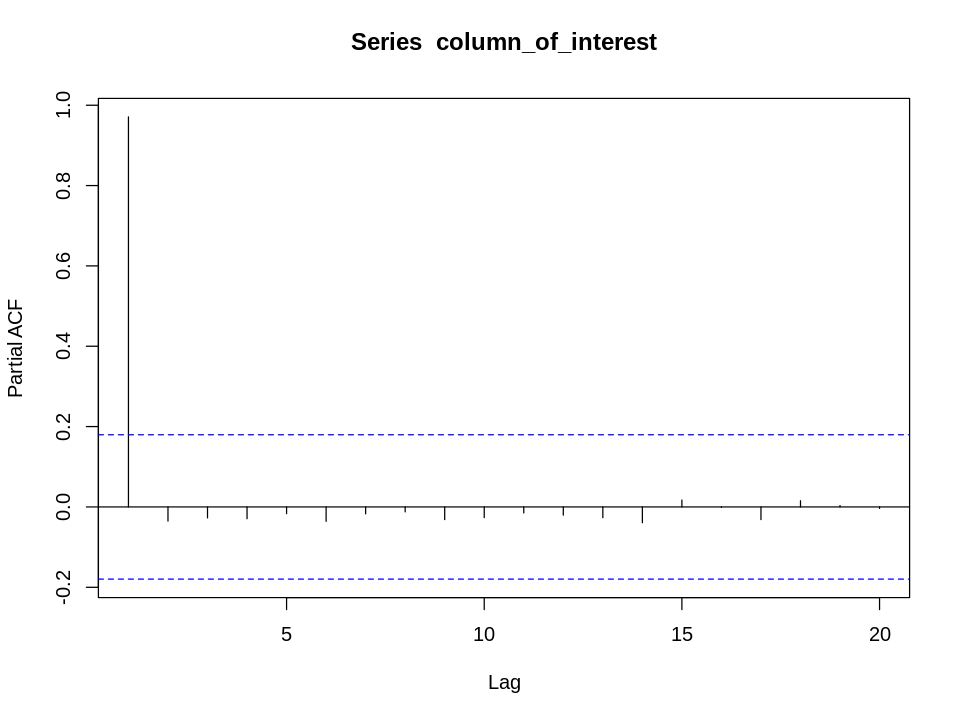

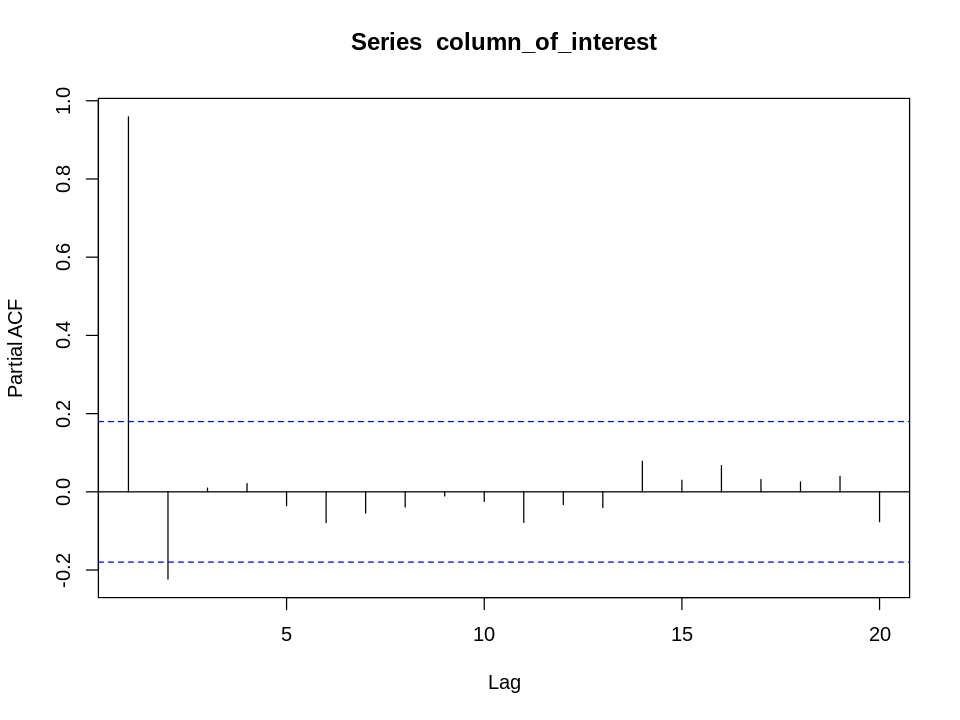

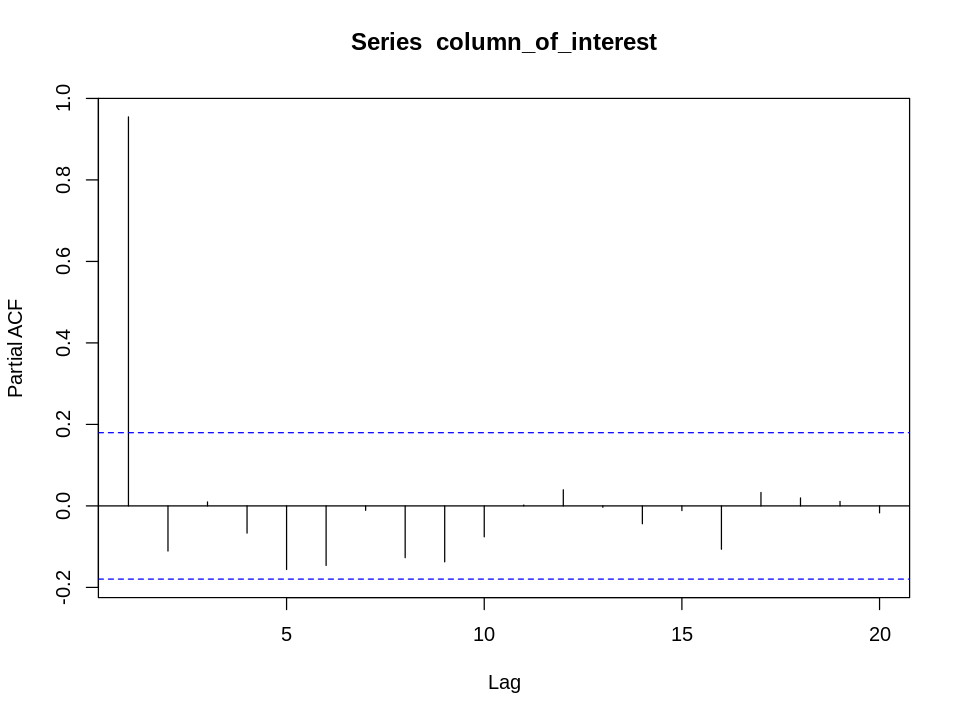

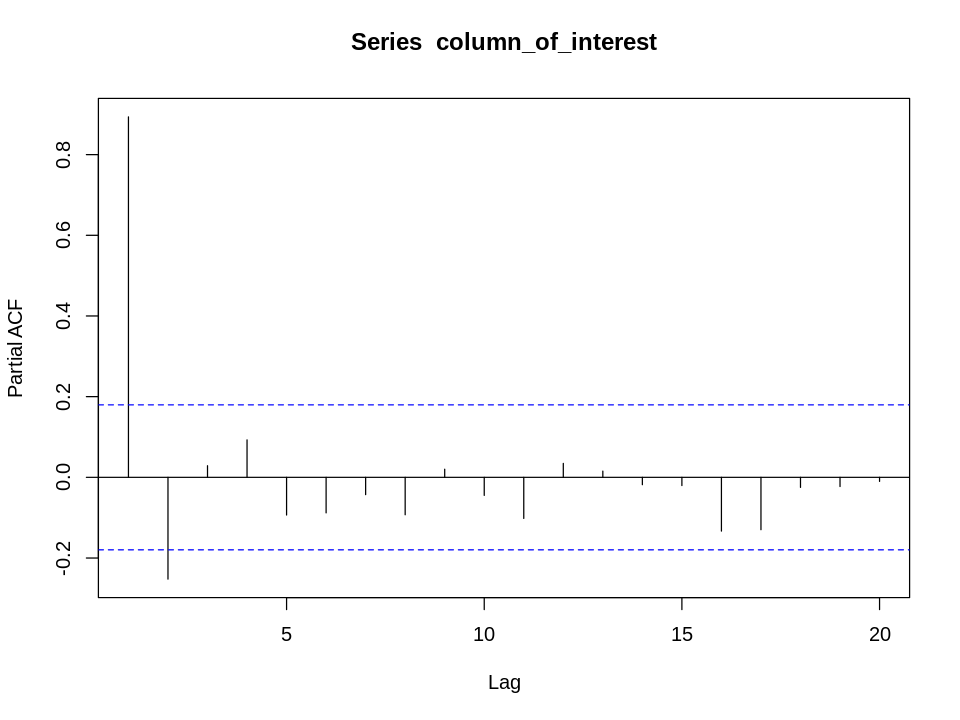

In [ ]:
#Plot PACF plot
#  'Eco_Growth' is the column of interest
column_of_interest <- data$Eco_Growth

# Plot the ACF of the 'Eco_Growth' column
pacf_plot <- pacf(column_of_interest, lag.max = 20)  # Adjust lag.max as needed

# 'Inflation' is the column of interest
column_of_interest <- data$Inflation

# Plot the ACF of the 'Eco_Inflation' column
pacf_plot <- pacf(column_of_interest, lag.max = 20)  # Adjust lag.max as needed

#  'Int..Trade' is the column of interest
column_of_interest <- data$Int..Trade

# Plot the ACF of the 'Int..Trade' column
pacf_plot <- pacf(column_of_interest, lag.max = 20)  # Adjust lag.max as needed

#  'Monetary_Policy' is the column of interest
column_of_interest <- data$Monetary_Policy

# Plot the ACF of the 'Monetary_Policy' column
pacf_plot <- pacf(column_of_interest, lag.max = 20)  # Adjust lag.max as needed

#'Risk_Apetite' is the column of interest
column_of_interest <- data$Risk_Apetite

# Plot the ACF of the 'Risk_Apetite' column
pacf_plot <- pacf(column_of_interest, lag.max = 20)  # Adjust lag.max as needed


TRAIN AND TEST SPLIT

In [ ]:
# Split the data into training and test datasets
train_df <- data[1:(nrow(data) - 12), ]  # Keep all rows except the last 12 for training
test_df <- data[(nrow(data) - 11):nrow(data), ]  # Keep the last 12 rows for testing


In [ ]:
# Check the dimensions of test_df
cat("Dimensions of test_df:", dim(test_df), "\n")

# Display the first 12 rows of test_df
head(test_df, 12)


Dimensions of test_df: 12 7 


,Eco_Growth,Inflation,Int..Trade,Monetary_Policy,Risk_Apetite,S.P,return_percentage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01-08-2022,0.20,295.320,122.2373,3.250000,4.526522,4158.563,-7.4074281
01-09-2022,0.11,296.539,125.5069,3.856667,4.985455,3850.520,-3.2325376
01-10-2022,-0.12,297.987,127.4084,4.375000,4.998095,3726.051,5.1378154
01-11-2022,-0.58,298.598,124.8149,4.503500,4.676818,3917.489,-0.1303799
01-12-2022,-0.47,298.990,122.2021,4.288571,4.583182,3912.381,1.2339174
01-01-2023,0.43,300.536,119.7765,4.207500,4.343810,3960.657,3.0052653
01-02-2023,-0.33,301.648,120.3156,4.533684,4.200500,4079.685,-2.7238773
01-03-2023,-0.49,301.808,120.8060,4.302609,4.691304,3968.559,3.8529913
01-04-2023,0.07,302.918,119.4183,4.016000,4.565500,4121.467,0.5994422


In [ ]:
# Check the dimensions of train_df
cat("Dimensions of train_df:", dim(train_df), "\n")
# Display the first 12 rows of train_df
head(train_df, 12)
class(train_df) #to compare its type after fitting the model


Dimensions of train_df: 107 7 


,Eco_Growth,Inflation,Int..Trade,Monetary_Policy,Risk_Apetite,S.P,return_percentage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01-09-2013,0.09,233.544,93.47056,0.4040000,4.642857,1687.174,0.00000000
01-10-2013,-0.01,233.669,92.49927,0.3354545,4.554348,1720.027,3.69264527
01-11-2013,0.29,234.100,93.37367,0.3036842,4.321364,1783.541,1.35877101
01-12-2013,-0.16,234.719,93.53402,0.3400000,4.087143,1807.775,0.80659524
01-01-2014,-0.71,235.288,94.46475,0.3938095,3.967727,1822.357,-0.29203559
01-02-2014,0.44,235.547,94.64558,0.3268421,4.030500,1817.035,2.55848692
01-03-2014,0.47,236.028,94.44082,0.3990476,3.807619,1863.523,0.03970973
01-04-2014,0.03,236.468,93.99555,0.4171429,3.705238,1864.263,1.36803688
01-05-2014,0.10,236.918,93.67003,0.3890476,3.750000,1889.767,3.03320312


[1] "data.frame"

FIT VAR (VECTOR AUTOREGRESSIVE) MODEL

In [ ]:
#converting dataframe into time series for fitting the model
train_tf <- ts(train_df, start = c(2013, 09), frequency = 12)


In [ ]:
#finding optimal lag
lagselect<-VARselect(train_df,lag.max = 10,type = 'const')
lagselect$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
    10      2      2      3

In [ ]:
# building the model
model<-VAR(train_df,p = 10)
summary(model)


VAR Estimation Results:
Endogenous variables: Eco_Growth, Inflation, Int..Trade, Monetary_Policy, Risk_Apetite, S.P, return_percentage 
Deterministic variables: const 
Sample size: 97 
Log Likelihood: -427.914 
Roots of the characteristic polynomial:
1.057 1.057 1.019 1.019 1.016 1.016 1.009 0.9939 0.9939 0.9772 0.9772 0.9735 0.9735 0.9726 0.9726 0.9697 0.9697 0.9571 0.9571 0.9554 0.9554 0.9552 0.9552 0.9534 0.9534 0.9533 0.9533 0.9467 0.9467 0.9458 0.9458 0.9448 0.9448 0.9422 0.9422 0.9403 0.9403 0.9355 0.9355 0.9349 0.9349 0.933 0.933 0.9323 0.9323 0.9312 0.9312 0.9266 0.9266 0.9215 0.9215 0.9147 0.9147 0.9044 0.9044 0.9026 0.9026 0.8846 0.8846 0.8723 0.8723 0.8543 0.8543 0.755 0.755 0.7436 0.7436 0.2803 0.2803 0.2306
Call:
VAR(y = train_df, p = 10)


Estimation results for equation Eco_Growth: 
Eco_Growth = Eco_Growth.l1 + Inflation.l1 + Int..Trade.l1 + Monetary_Policy.l1 + Risk_Apetite.l1 + S.P.l1 + return_percentage.l1 + Eco_Growth.l2 + Inflation.l2 + Int..Trade.l2 + Monetary_Pol

DIAGNOSING THE MODEL

In [ ]:
#Check for Heteroscedasticity
Arch1 <- arch.test(model,lags.multi = 12,multivariate.only = TRUE)
Arch1


	ARCH (multivariate)

data:  Residuals of VAR object model
Chi-squared = 2380, df = 9408, p-value = 1

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object model
Chi-squared = 2380, df = 9408, p-value = 1



In [ ]:
#Check for Normal Distribution of the residuals
Norm1 <- normality.test(model,multivariate.only = TRUE)
Norm1

$JB

	JB-Test (multivariate)

data:  Residuals of VAR object model
Chi-squared = 79.394, df = 14, p-value = 3.665e-11


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 20.096, df = 7, p-value = 0.005365


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 59.297, df = 7, p-value = 2.085e-10


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object model
Chi-squared = 79.394, df = 14, p-value = 3.665e-11


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 20.096, df = 7, p-value = 0.005365


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object model
Chi-squared = 59.297, df = 7, p-value = 2.085e-10




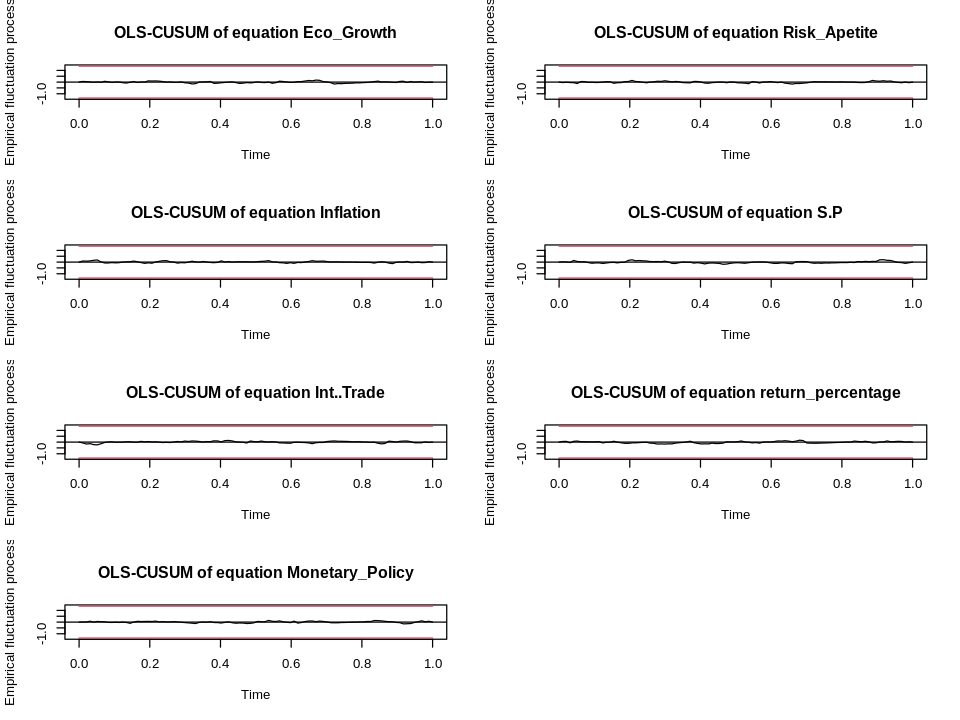

In [ ]:
#check for stability
Stability1<-stability(model,type='OLS-CUSUM')
plot(Stability1)

FORECASTING

In [ ]:
#VAR FORECAST
forecast<-predict(model,n.ahead = 12,ci = 0.95)


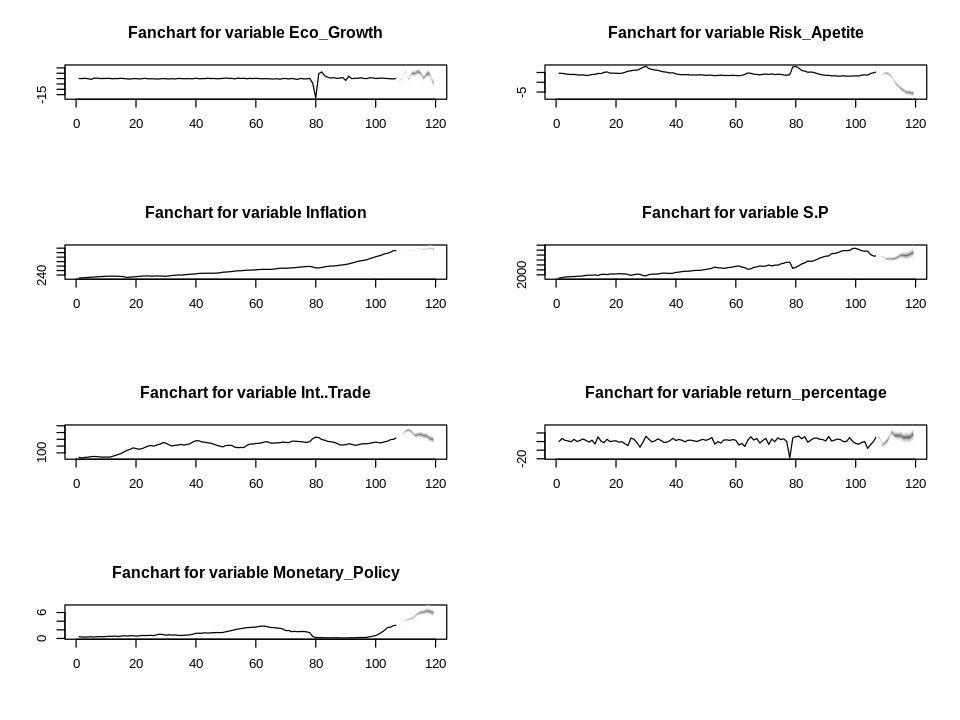

In [ ]:
#Draw plot for each column
fanchart(forecast)

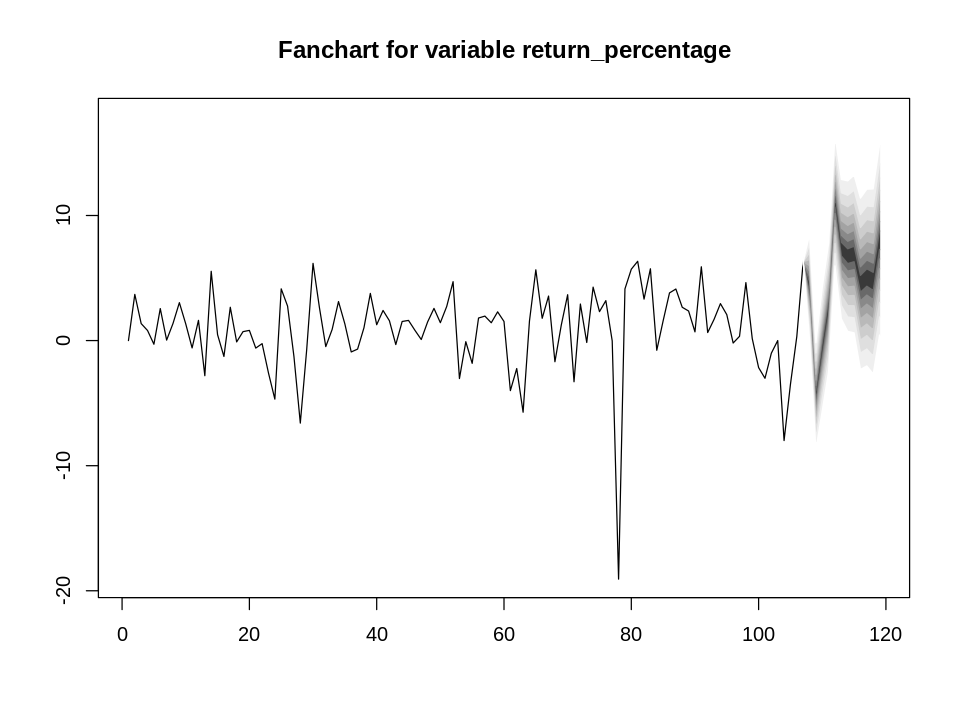

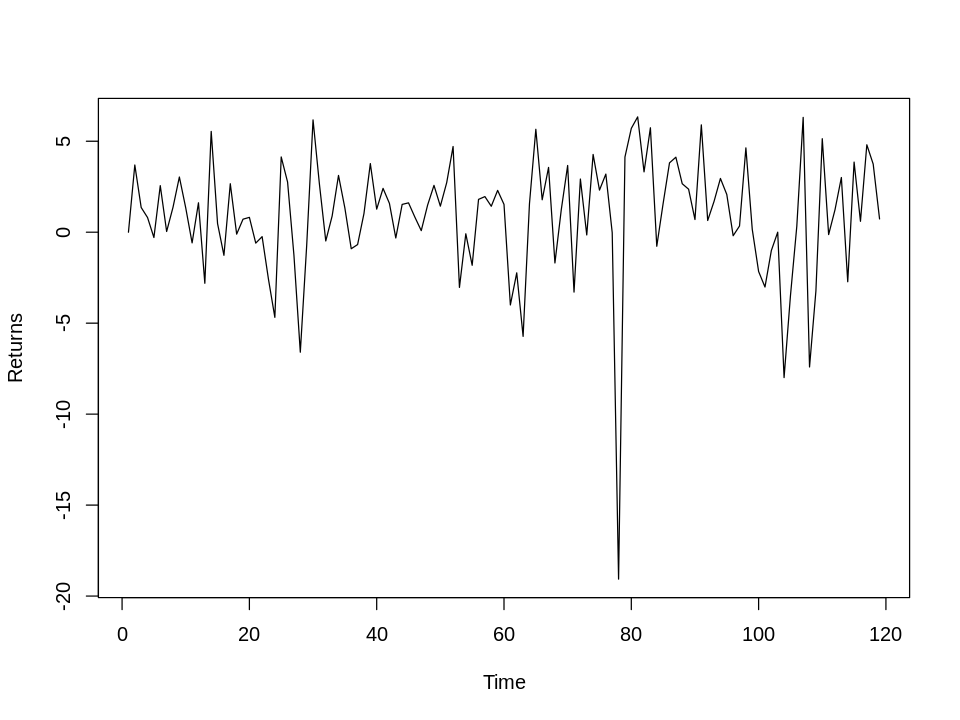

In [ ]:
#Compare the predictions and actual values from 01/08/2022
fanchart(forecast,names='return_percentage')
# Plot 'return_percentage' column
plot(data$return_percentage, type = "l", xlab = "Time", ylab = "Returns")

#if you see they both look more or less same at that time duration

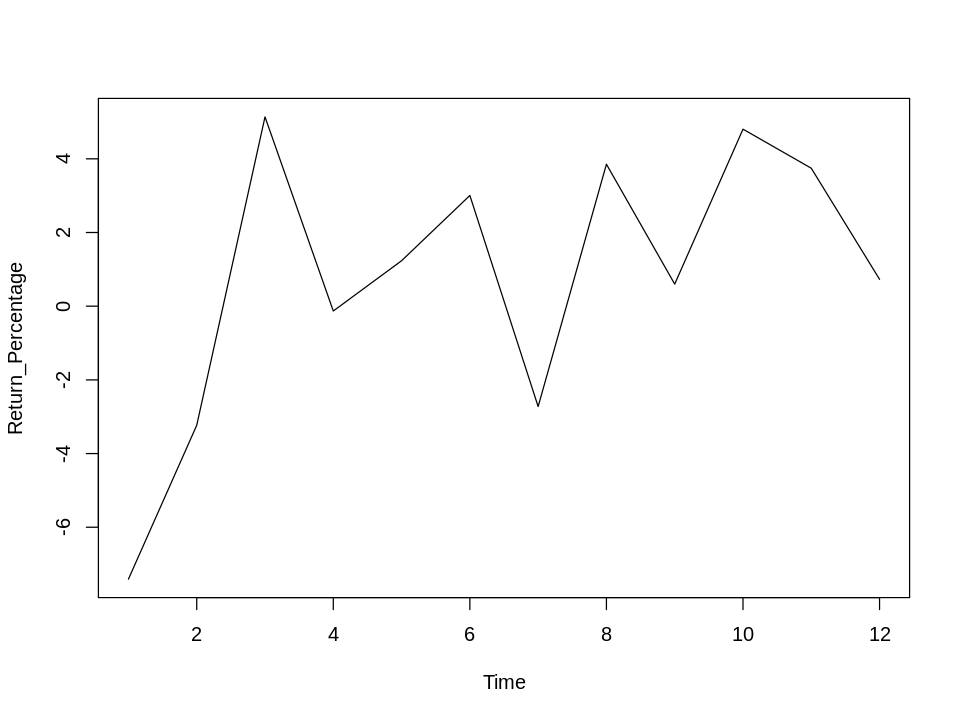

In [ ]:
# Plot true values of return_percentage from testing data
plot(test_df$return_percentage, type = "l", xlab = "Time", ylab = "Return_Percentage")


DECISION TO BUY THE S&P500 OR KEEP CASH IN A PARTICULAR MONTH

In [ ]:
# Access the forecasted values for each column
forecast_values <- forecast$fcst

# Print the forecasted values
print(forecast_values)


$Eco_Growth
            fcst       lower     upper       CI
 [1,] -2.0017115  -4.2488120  0.245389 2.247100
 [2,]  0.5205969  -2.5595604  3.600754 3.080157
 [3,]  7.6684356   3.0190485 12.317823 4.649387
 [4,] -1.3907973  -6.1972331  3.415638 4.806436
 [5,]  4.9820222  -0.3844171 10.348461 5.366439
 [6,]  4.7562858  -0.7989674 10.311539 5.555253
 [7,]  6.5236484   0.7768148 12.270482 5.746834
 [8,]  5.2556492  -0.7047589 11.216057 5.960408
 [9,]  0.2980053  -5.7883911  6.384402 6.086396
[10,]  4.2905535  -2.0044578 10.585565 6.295011
[11,]  4.8357970  -1.8574086 11.529003 6.693206
[12,] -3.6976324 -10.6415708  3.246306 6.943938

$Inflation
          fcst    lower    upper        CI
 [1,] 294.1707 293.2497 295.0918 0.9210632
 [2,] 293.9954 292.3335 295.6574 1.6619230
 [3,] 294.7678 292.4425 297.0932 2.3253819
 [4,] 295.0096 291.9869 298.0323 3.0226654
 [5,] 293.5349 290.0356 297.0342 3.4993387
 [6,] 296.2116 292.3602 300.0630 3.8513943
 [7,] 299.5286 295.4555 303.6018 4.0731095
 [8,] 29

In [ ]:
# Access the forecasted values for return_percentage column
forecasted_column <- forecast_values$return_percentage

# Print the forecasted values for the specific column
print(forecasted_column)


            fcst      lower     upper        CI
 [1,]  4.2863657  -2.069376 10.642107  6.355742
 [2,] -4.4322209 -10.949238  2.084796  6.517017
 [3,] -0.6910273  -8.174679  6.792625  7.483652
 [4,]  2.6831273  -5.125741 10.491996  7.808869
 [5,] 11.1862037   3.206751 19.165656  7.979452
 [6,]  7.3127261  -1.204784 15.830236  8.517510
 [7,]  6.7495334  -2.449970 15.949037  9.199504
 [8,]  6.9246097  -2.711942 16.561161  9.636551
 [9,]  4.5433195  -5.921017 15.007656 10.464337
[10,]  5.0382035  -5.764899 15.841306 10.803103
[11,]  4.7312838  -6.574984 16.037551 11.306268
[12,]  8.0332138  -3.568119 19.634547 11.601333


In [ ]:
# Access the "fcst" column
fcst_column <- forecasted_column[, "fcst"]

# Print the "fcst" column
print(fcst_column)


 [1]  4.2863657 -4.4322209 -0.6910273  2.6831273 11.1862037  7.3127261
 [7]  6.7495334  6.9246097  4.5433195  5.0382035  4.7312838  8.0332138


In [ ]:
# Check if each value in the "fcst" column is greater than zero
greater_than_zero <- fcst_column > 0

# Print the indices of values greater than zero with a custom message
indices_greater_than_zero <- which(greater_than_zero)
cat('The months in which I have to invest in S&P from 01/07/2022 are', indices_greater_than_zero, '\n')




The months in which I have to invest in S&P from 01/07/2022 are 1 4 5 6 7 8 9 10 11 12 


In [ ]:
# Check if each value in the "fcst" column is less than zero
less_than_zero <- fcst_column < 0

# Print the indices of values less than zero
indices_less_than_zero <- which(less_than_zero)
cat('The months in which I have to remain cash from 01/07/2022 are',indices_less_than_zero)


The months in which I have to remain cash from 01/07/2022 are 2 3

**BASE LINE MODEL**

In [ ]:
# Read the CSV file into a data frame
data2 <- read.csv('SP500.csv')

# Display the first few rows of the data frame
head(data2)


,DATE,SP500
,<chr>,<dbl>
1,2013-09-01,1687.174
2,2013-10-01,1720.027
3,2013-11-01,1783.541
4,2013-12-01,1807.775
5,2014-01-01,1822.357
6,2014-02-01,1817.035


In [ ]:
# Calculate the return percentage and store it in a new column
data2$return_percentage <- diff(data2$SP500) / lag(data2$SP500, default = data2$SP500[1]) * 100

# Fill any NA values with 0 for the first row
data2$return_percentage[1] <- 0

# Display the first 120 rows of the data frame
head(data2, 120)


Warning message in diff(data2$SP500)/lag(data2$SP500, default = data2$SP500[1]):
“longer object length is not a multiple of shorter object length”


,DATE,SP500,return_percentage
,<chr>,<dbl>,<dbl>
1,2013-09-01,1687.174,0.00000000
2,2013-10-01,1720.027,3.69264529
3,2013-11-01,1783.541,1.35877101
4,2013-12-01,1807.775,0.80659522
5,2014-01-01,1822.357,-0.29203558
6,2014-02-01,1817.035,2.55848694
7,2014-03-01,1863.523,0.03970973
8,2014-04-01,1864.263,1.36803686
9,2014-05-01,1889.767,3.03320313


In [ ]:
# Set the row names of the data frame to the 'DATE' column
rownames(data2) <- data2$DATE

# Remove the 'DATE' column from the data frame (optional)
data2$DATE <- NULL

# Display the modified data frame
data2


,SP500,return_percentage
,<dbl>,<dbl>
2013-09-01,1687.174,0.00000000
2013-10-01,1720.027,3.69264529
2013-11-01,1783.541,1.35877101
2013-12-01,1807.775,0.80659522
2014-01-01,1822.357,-0.29203558
2014-02-01,1817.035,2.55848694
2014-03-01,1863.523,0.03970973
2014-04-01,1864.263,1.36803686
2014-05-01,1889.767,3.03320313


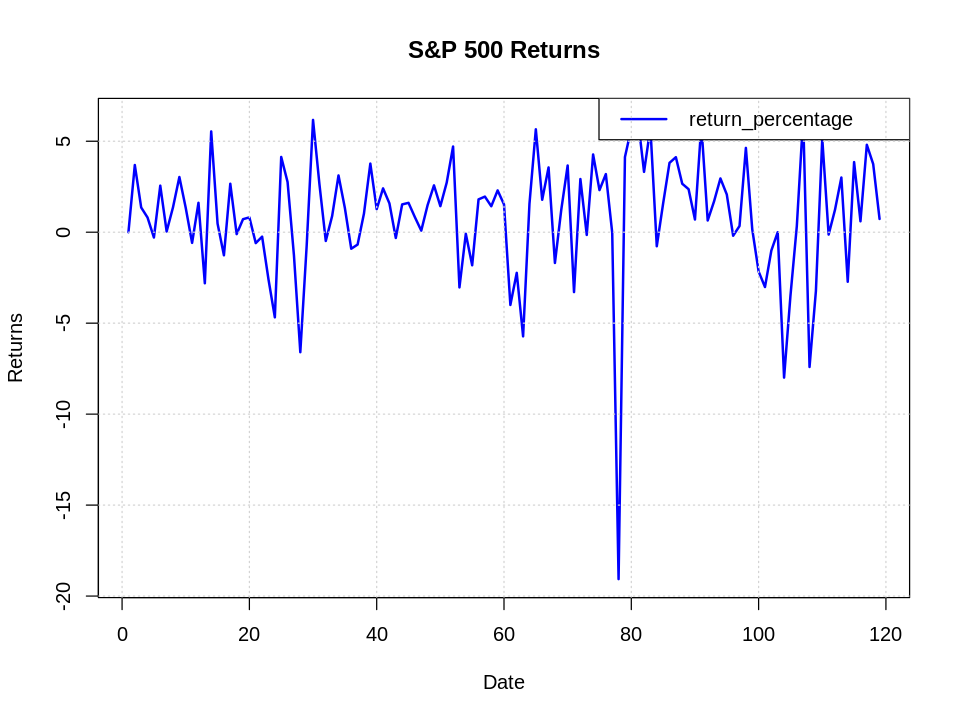

In [ ]:
column_name <- 'return_percentage'

# Extract the data from the specified column
data_to_plot <- data2[, column_name]

# Create a basic line plot
plot(data_to_plot, type = "l", col = "blue", xlab = "Date", ylab = "Returns",
     main = "S&P 500 Returns", lwd = 2)
legend("topright", legend = column_name, col = "blue", lwd = 2)
grid()


CHECK FOR STATIONARITY OF RETURNS

In [ ]:
library(tseries)

# Perform the Augmented Dickey-Fuller test
adf_fuller_result_0 <- adf.test(data$return_percentage)

# Print the results
cat("return_percentage\n")
cat("ADF Statistic: ", adf_fuller_result_0$statistic, "\n")
cat("p-value: ", adf_fuller_result_0$p.value, "\n")


Warning message in adf.test(data$return_percentage):
“p-value smaller than printed p-value”


return_percentage
ADF Statistic:  -4.527515 
p-value:  0.01 


In [ ]:
head(data2)


,SP500,return_percentage
,<dbl>,<dbl>
2013-09-01,1687.174,0.0000000
2013-10-01,1720.027,3.6926453
2013-11-01,1783.541,1.3587710
2013-12-01,1807.775,0.8065952
2014-01-01,1822.357,-0.2920356
2014-02-01,1817.035,2.5584869


TRAIN TEST SPLIT

In [ ]:
# Assuming 'data2' is your data frame
train_df_0 <- data2[1:(nrow(data2) - 12), ]  # Exclude the last 12 rows
test_df_0 <- data2[(nrow(data2) - 11):nrow(data2), ]  # Include the last 12 rows


In [ ]:
train_df_0

,SP500,return_percentage
,<dbl>,<dbl>
2013-09-01,1687.174,0.00000000
2013-10-01,1720.027,3.69264529
2013-11-01,1783.541,1.35877101
2013-12-01,1807.775,0.80659522
2014-01-01,1822.357,-0.29203558
2014-02-01,1817.035,2.55848694
2014-03-01,1863.523,0.03970973
2014-04-01,1864.263,1.36803686
2014-05-01,1889.767,3.03320313


In [ ]:
test_df_0

,SP500,return_percentage
,<dbl>,<dbl>
2022-08-01,4158.563,-7.4074281
2022-09-01,3850.520,-3.2325376
2022-10-01,3726.051,5.1378154
2022-11-01,3917.489,-0.1303799
2022-12-01,3912.381,1.2339174
2023-01-01,3960.657,3.0052653
2023-02-01,4079.685,-2.7238773
2023-03-01,3968.559,3.8529913
2023-04-01,4121.467,0.5994422


In [ ]:
#converting train_df to time series for fitting the model
train_tf_0 <- ts(train_df, start = c(2013, 09), frequency = 12)

ACF AND PACF PLOT

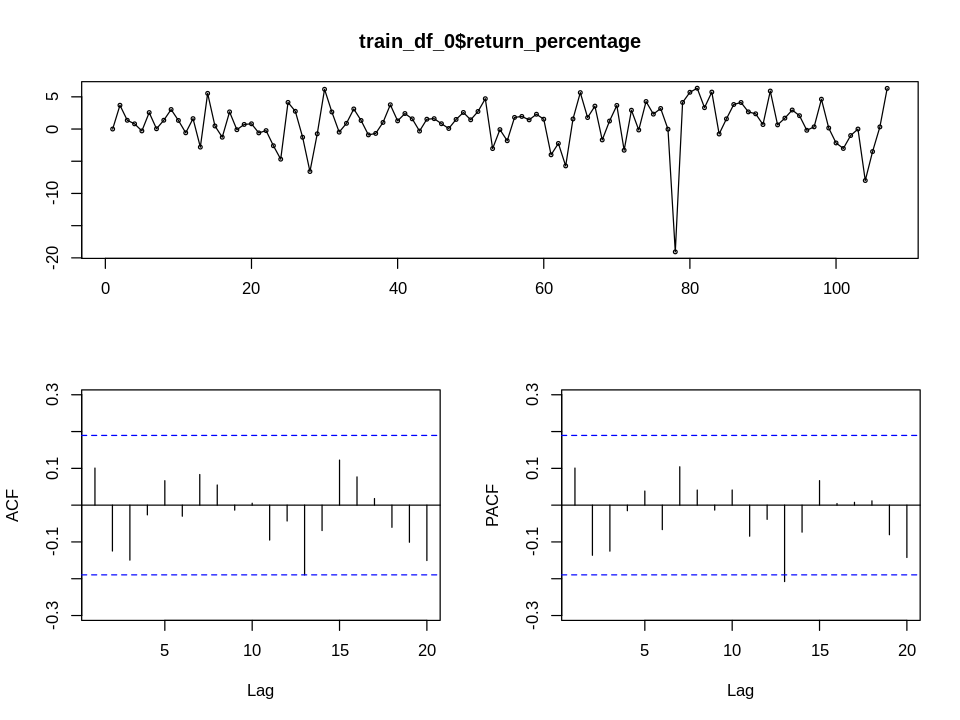

In [ ]:
forecast::tsdisplay(train_df_0$return_percentage)

CONVERTING RETURN_PERCENTAGE TO TIME SERIES FOR FITTING THE MODEL

In [ ]:
ret<-ts(train_df_0$return_percentage,start = c(2003,09),end = c(2022,07),frequency = 12)

ARIMA(AUTO REGRESSIVE MOVING AVERAGE)

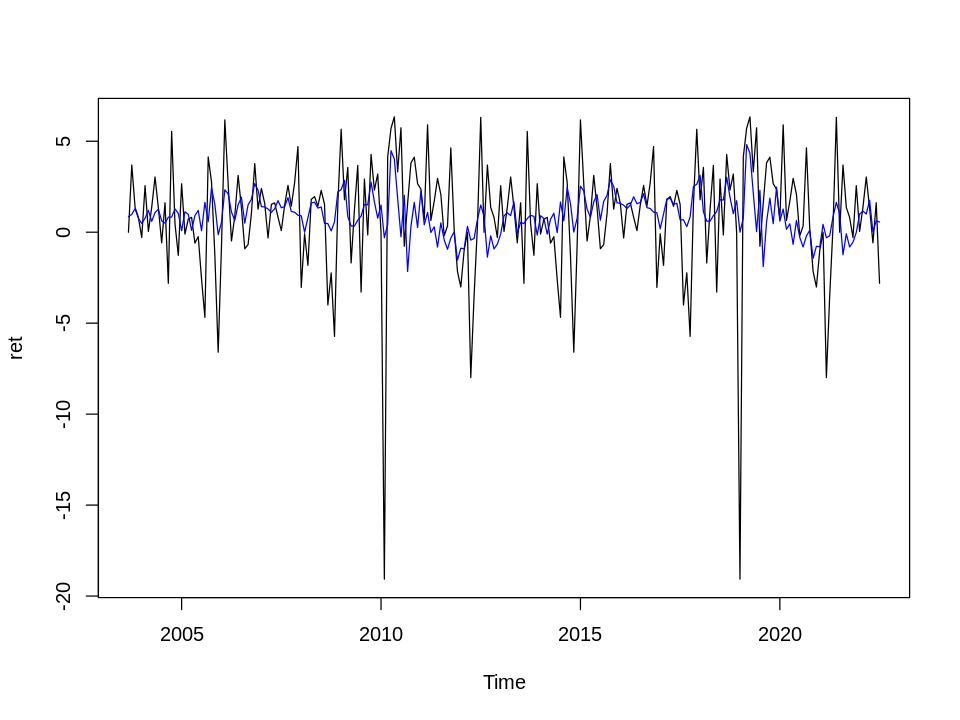

In [ ]:
model2=forecast::Arima(ret,c(11,0,2))
#plot true returns
plot(ret)
#plot fitted values
lines(fitted(model2), col='blue')

In [ ]:
#get the summary
summary(model2)

Series: ret 
ARIMA(11,0,2) with non-zero mean 

Coefficients:
         ar1     ar2      ar3     ar4     ar5      ar6     ar7     ar8      ar9
      0.3874  0.4644  -0.1463  0.1014  0.0985  -0.0516  0.0836  0.0354  -0.0996
s.e.  0.2508  0.2615   0.0887  0.0777  0.0819   0.0778  0.0805  0.0832   0.0764
        ar10     ar11      ma1      ma2    mean
      0.0326  -0.1183  -0.3523  -0.6477  0.9024
s.e.  0.0804   0.0676   0.2473   0.2471  0.0230

sigma^2 = 9.927:  log likelihood = -577.18
AIC=1184.36   AICc=1186.64   BIC=1235.74

Training set error measures:
                      ME     RMSE      MAE  MPE MAPE      MASE          ACF1
Training set -0.05918946 3.052065 2.014388 -Inf  Inf 0.5688277 -0.0007967521

FORECASTING

In [ ]:
library(forecast)
forecast_ret<-forecast(model2,h=12)

In [ ]:
forecast_ret

         Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
Aug 2022      0.8248568 -3.221669 4.871383 -5.363771 7.013484
Sep 2022      0.8183921 -3.231236 4.868020 -5.374980 7.011764
Oct 2022      1.7558098 -2.348605 5.860225 -4.521352 8.032971
Nov 2022      0.8176232 -3.359663 4.994910 -5.570985 7.206232
Dec 2022      0.6642433 -3.519061 4.847547 -5.733568 7.062055
Jan 2023      0.7993072 -3.384480 4.983095 -5.599244 7.197858
Feb 2023      0.4716650 -3.718244 4.661574 -5.936248 6.879577
Mar 2023      0.4935555 -3.699420 4.686531 -5.919047 6.906158
Apr 2023      1.0414456 -3.151702 5.234594 -5.371421 7.454312
May 2023      0.6707874 -3.533468 4.875042 -5.759066 7.100641
Jun 2023      1.3634998 -2.841968 5.568967 -5.068208 7.795207
Jul 2023      0.7731300 -3.482228 5.028488 -5.734878 7.281138

DECISION TO BUY THE S&P500 OR KEEP CASH IN A PARTICULAR MONTH

In [ ]:
# Extract the point forecasts from the 'forecast_values' object
forecasted_values <- forecast_ret$mean

# Check which forecasted values are greater than zero
greater_than_zero <- forecasted_values > 0

# Print the forecasted values greater than zero
cat("Forecasted values greater than zero:\n")
print(forecasted_values[greater_than_zero])

# Check which forecasted values are less than or equal to zero
less_than_or_equal_to_zero <- forecasted_values <= 0

# Print the forecasted values less than or equal to zero
cat("\nForecasted values less than or equal to zero:\n")
print(forecasted_values[less_than_or_equal_to_zero])



Forecasted values greater than zero:
 [1] 0.8248568 0.8183921 1.7558098 0.8176232 0.6642433 0.7993072 0.4716650
 [8] 0.4935555 1.0414456 0.6707874 1.3634998 0.7731300

Forecasted values less than or equal to zero:
numeric(0)


In [ ]:
# Extract the point forecasts from the 'forecast_values' object
forecasted_values <- forecast_ret$mean

# Find the indices where forecasted values are greater than zero
indices_greater_than_zero <- which(forecasted_values > 0)

# Find the indices where forecasted values are less than or equal to zero
indices_less_than_or_equal_to_zero <- which(forecasted_values <= 0)

# Print the indices of forecasted values greater than zero
cat("The months in which I have to invest in S&P500 from 01/07/2022 are \n")
print(indices_greater_than_zero)

# Print the indices of forecasted values less than or equal to zero
cat("\nThe months in which I have to remain cash from 01/07/2022 are\n")
print(indices_less_than_or_equal_to_zero)


The months in which I have to invest in S&P500 from 01/07/2022 are 
 [1]  1  2  3  4  5  6  7  8  9 10 11 12

The months in which I have to remain cash from 01/07/2022 are
integer(0)
